In [1]:
# Importing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_test.csv")
train = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_train.csv")
labels = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_labels_train.csv")

df = pd.merge(train, labels, on = ["city", "year", "weekofyear"])

# How do we deal with missing data? 


#What percentage of rows are missing from each column?
print(df.isnull().sum()/(len(df.city))*100)

# We would lose almost 20% of data if we dropped all NA rows


(len(df.dropna())/len(df))

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

0.823489010989011

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Import libraries and check the versions
import sys
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
%matplotlib inline

In [5]:
print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__ )
print('Missingno version ' + msno.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.3
Pandas version 0.23.0
Matplotlib version 2.2.2
Missingno version 0.4.1


In [10]:
df.isnull().sum()
df.notnull().sum()

city                                     1456
year                                     1456
weekofyear                               1456
week_start_date                          1456
ndvi_ne                                  1262
ndvi_nw                                  1404
ndvi_se                                  1434
ndvi_sw                                  1434
precipitation_amt_mm                     1443
reanalysis_air_temp_k                    1446
reanalysis_avg_temp_k                    1446
reanalysis_dew_point_temp_k              1446
reanalysis_max_air_temp_k                1446
reanalysis_min_air_temp_k                1446
reanalysis_precip_amt_kg_per_m2          1446
reanalysis_relative_humidity_percent     1446
reanalysis_sat_precip_amt_mm             1443
reanalysis_specific_humidity_g_per_kg    1446
reanalysis_tdtr_k                        1446
station_avg_temp_c                       1413
station_diur_temp_rng_c                  1413
station_max_temp_c                

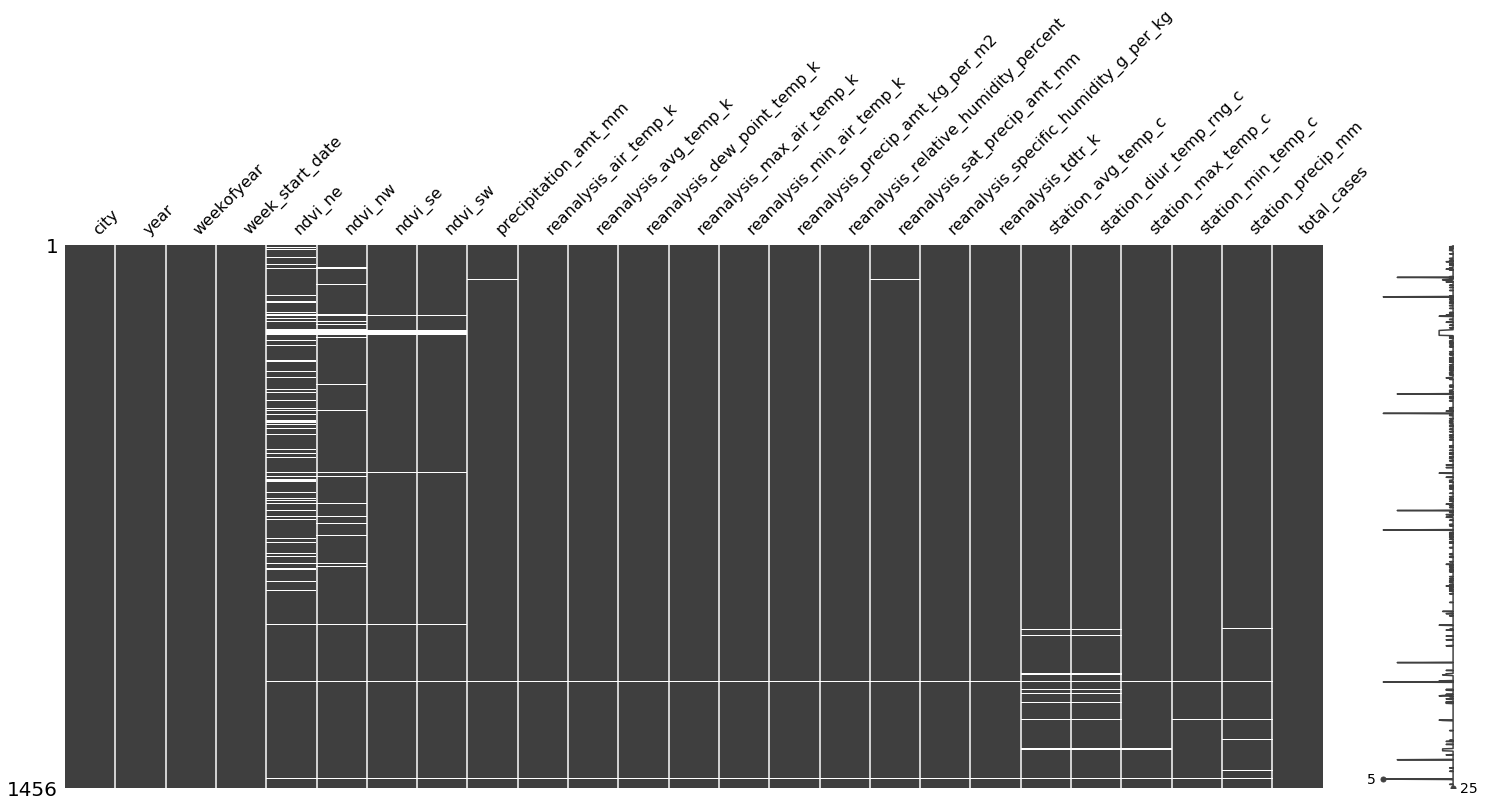

In [11]:
msno.matrix(df)

In [16]:
pandas_profiling.ProfileReport(df)

Number of variables,25
Number of observations,1456
Total Missing (%),1.4%
Total size in memory,295.8 KiB
Average record size in memory,208.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [21]:
#Or method bfill for backfill
df_forward_fill = df.fillna(method="ffill")

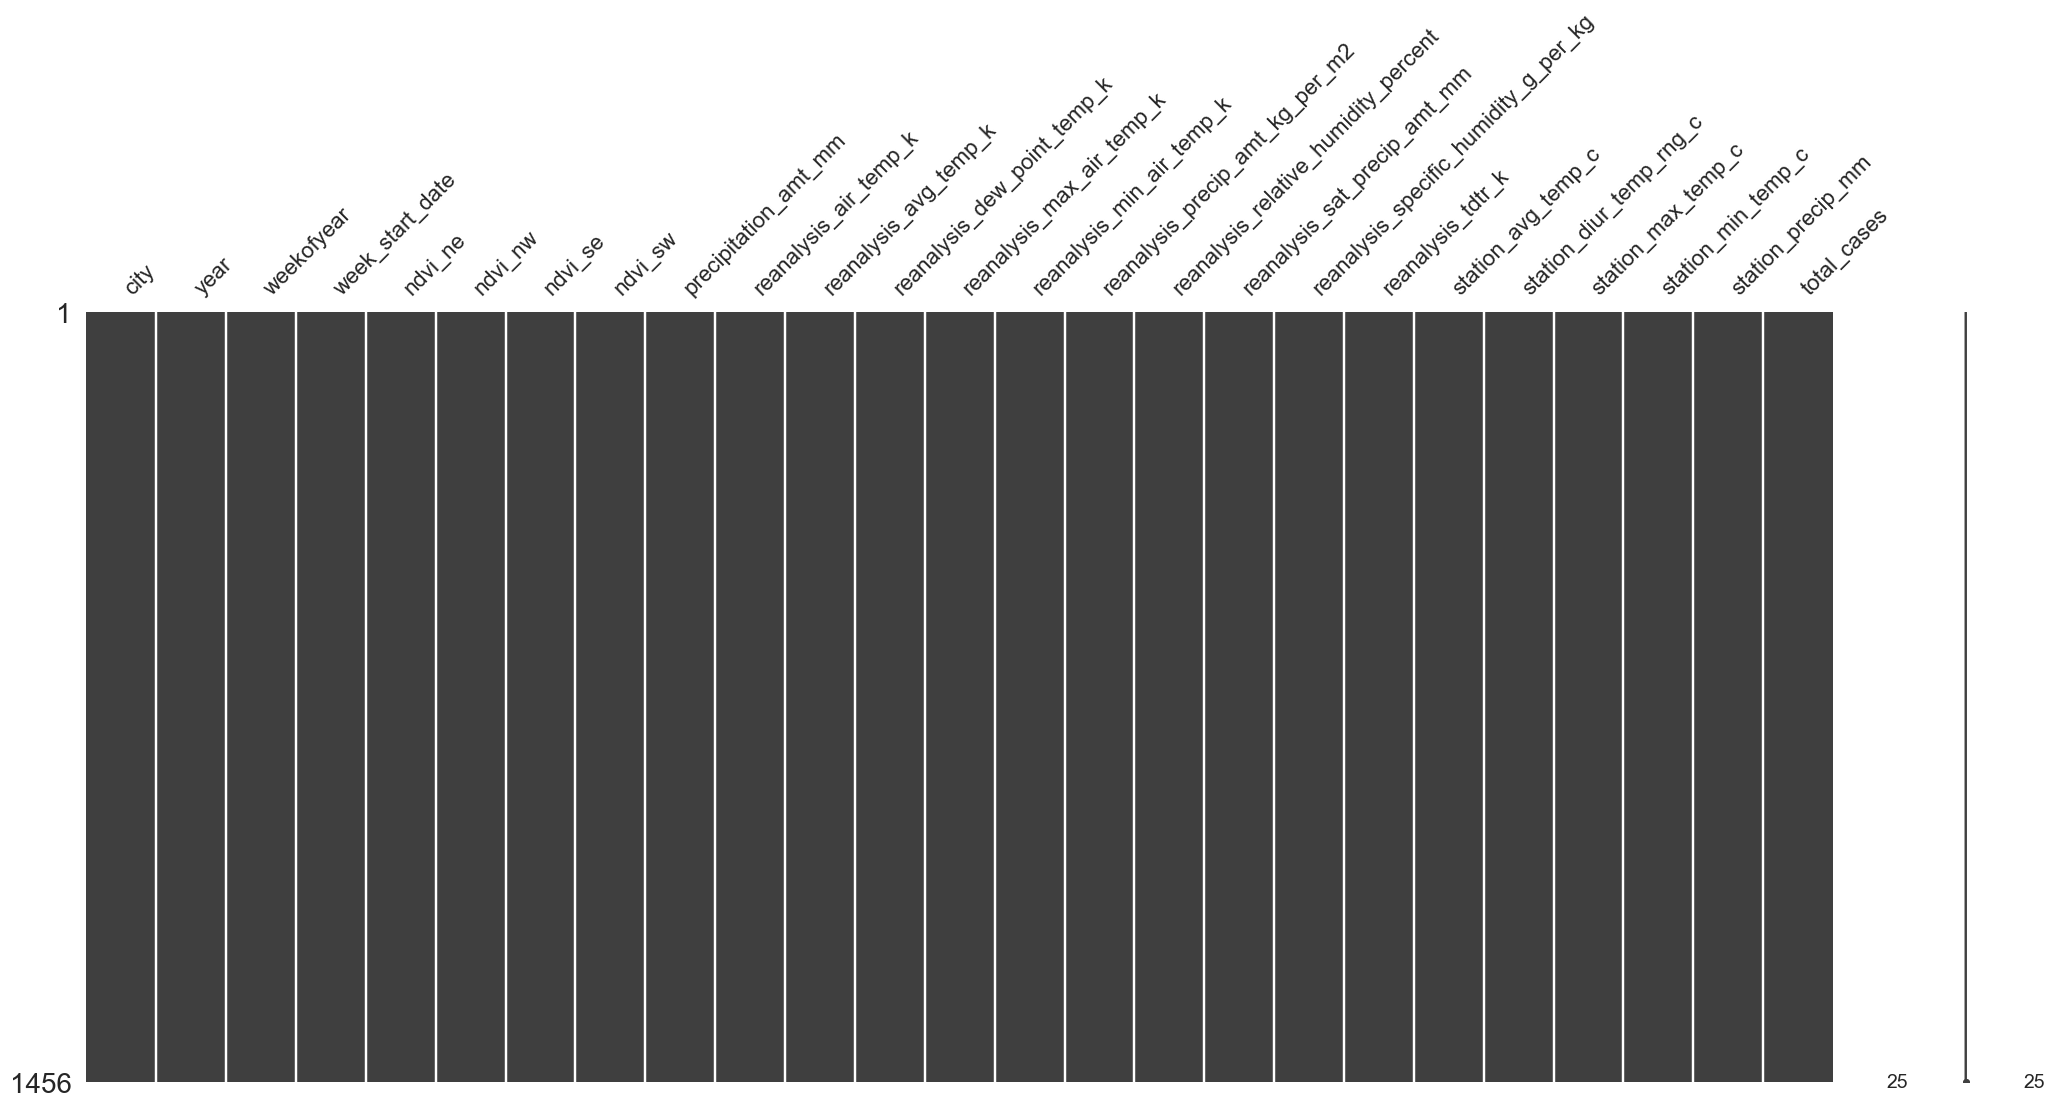

In [22]:
msno.matrix(df_forward_fill)

In [80]:
df_interpolate = df.interpolate(how = "linear")

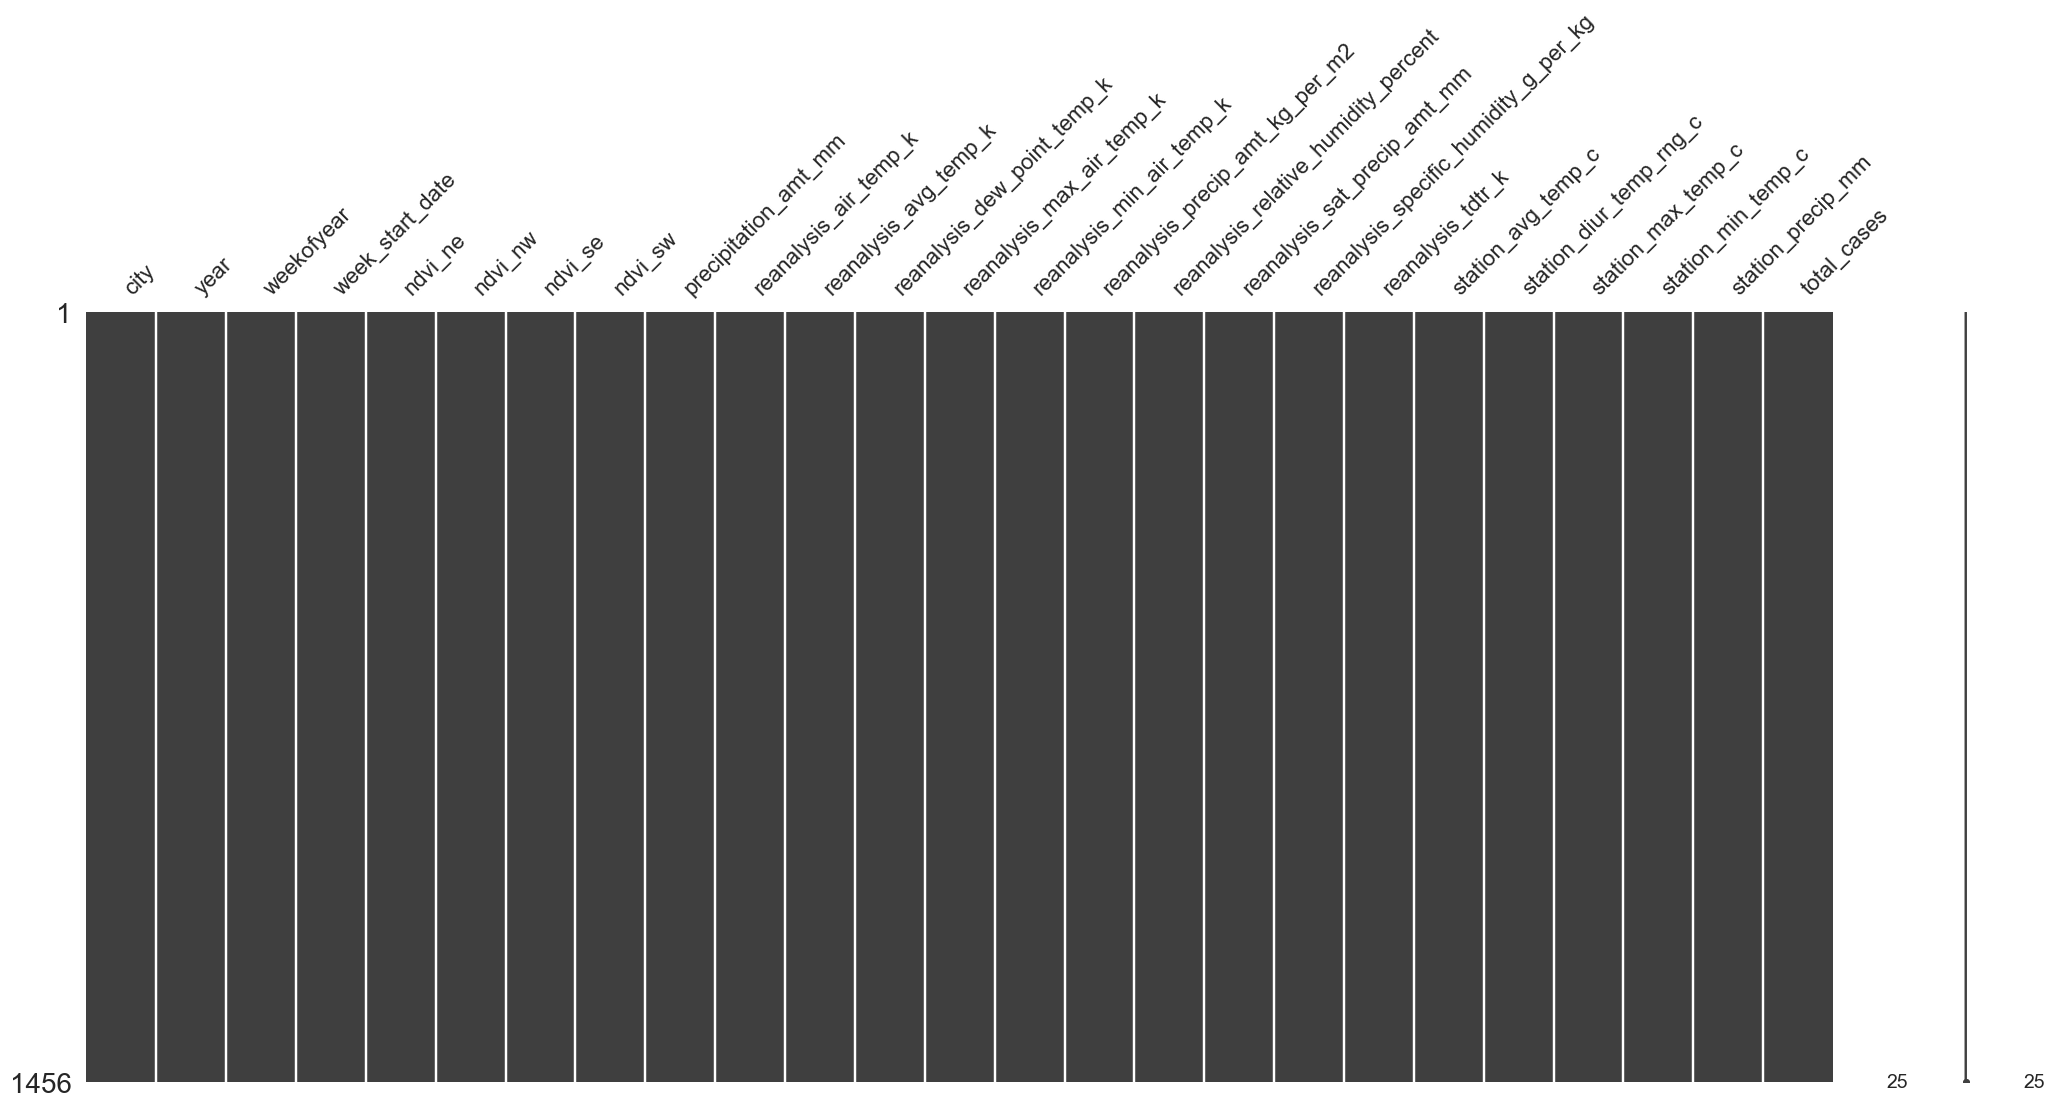

In [81]:
msno.matrix(df_interpolate)

# How to See The NA Rows & The Interpolation

In [84]:
mask=False
for col in df.columns: mask = mask | df[col].isnull()
dfnulls = df[mask]
dfnulls_interpolate = df_interpolate[mask]

In [87]:
dfnulls.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
45,sj,1991,11,1991-03-12,0.0577,NaN,0.213250,0.240543,0.00,297.431429,...,78.138571,0.00,14.787143,2.728571,25.928571,8.971429,31.7,20.6,3.6,17
62,sj,1991,28,1991-07-09,0.0969,NaN,0.138050,0.167917,6.13,300.001429,...,77.877143,6.13,17.151429,2.428571,28.414286,6.671429,32.8,24.4,4.6,14
65,sj,1991,31,1991-07-30,0.0577,NaN,0.190643,0.159329,48.41,299.852857,...,81.897143,48.41,17.878571,2.300000,28.571429,6.342857,33.3,25.0,18.0,25


In [89]:
dfnulls_interpolate.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
45,sj,1991,11,1991-03-12,0.0577,0.221250,0.213250,0.240543,0.00,297.431429,...,78.138571,0.00,14.787143,2.728571,25.928571,8.971429,31.7,20.6,3.6,17
62,sj,1991,28,1991-07-09,0.0969,0.127633,0.138050,0.167917,6.13,300.001429,...,77.877143,6.13,17.151429,2.428571,28.414286,6.671429,32.8,24.4,4.6,14
65,sj,1991,31,1991-07-30,0.0577,0.060225,0.190643,0.159329,48.41,299.852857,...,81.897143,48.41,17.878571,2.300000,28.571429,6.342857,33.3,25.0,18.0,25


In [160]:
series1= df["station_avg_temp_c"].squeeze()
series2= df_interpolate["station_avg_temp_c"].squeeze()

# Graph Shows interpolation didn't produce any outliar data

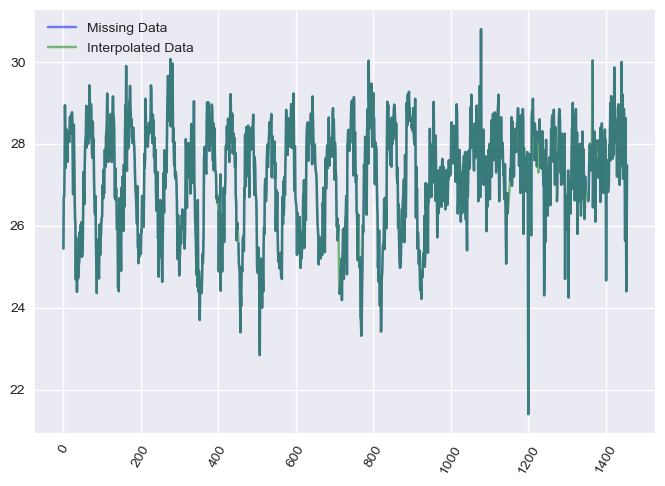

In [165]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Plot the aapl time series in blue
plt.plot(series1, color='blue', label='Missing Data', alpha = 0.5)

# Plot the ibm time series in green
plt.plot(series2, color='green', label='Interpolated Data', alpha = 0.5)

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()